# Child Health Indicators

### Predict child mortality rate (between ages 1 and 5) depending on the water and sanitation conditions from current and past years.
##### Improved drinking water sources include “at least basic services”, which refers to households using an improved water source with water collection times of no more than 30 minutes per round trip. 
##### Access to “at least basic sanitation” includes the population using improved sanitation methods that are not shared.

#### The idea of predicting child mortality rate based on water and sanitation factors is useful to evaluate what should be improved in developing countries to decrease child mortality.

In [ ]:
# import libraries

from numpy.random import seed
seed(100)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
tf.random.set_seed(100)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# import dataset

url ="http://www.ciesin.columbia.edu/data/nrpi-chi-2020/nrpi-chi-2020-preliminary-release.xlsx"
df = pd.read_excel(url, sheet_name='CHI_2020')
print(df.shape)
df2 = df.copy()
df.head()

(194, 52)


,ISO3,CountryName,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,cmr_18,cmr_19,chmort_pt_10,chmort_pt_11,chmort_pt_12,chmort_pt_13,chmort_pt_14,chmort_pt_15,chmort_pt_16,chmort_pt_17,chmort_pt_18,chmort_pt_19,wat_10,wat_11,wat_12,wat_13,wat_14,wat_15,wat_16,wat_17,wat_18,wat_19,san_10,san_11,san_12,san_13,san_14,san_15,san_16,san_17,san_18,san_19,CHI_v2020_10,CHI_v2020_11,CHI_v2020_12,CHI_v2020_13,CHI_v2020_14,CHI_v2020_15,CHI_v2020_16,CHI_v2020_17,CHI_v2020_18,CHI_v2020_19
0,AFG,Afghanistan,25.131763,23.641959,22.204697,20.795326,19.494679,18.245083,17.132262,16.129541,15.229539,14.427644,64.113481,66.240824,68.293140,70.305629,72.162869,73.947211,75.536246,76.968067,78.253211,79.398264,48.356360,50.927307,53.531704,56.169645,58.841232,61.546930,64.286484,67.064623,67.064623,67.064623,34.177028,35.457100,36.749962,38.055832,39.374932,40.707707,42.054183,43.417610,43.417610,43.417610,48.882290,50.875077,52.858269,54.843702,56.793011,58.733949,60.625638,62.483433,62.911815,63.293499
1,ALB,Albania,1.436214,1.328161,1.234154,1.156805,1.100109,1.064852,1.049183,1.049069,1.060550,1.077409,97.949180,98.103472,98.237709,98.348158,98.429116,98.479460,98.501835,98.501997,98.485603,98.461531,87.811285,87.760337,87.860432,89.461088,90.981204,91.001022,91.020370,91.039228,91.039228,91.039228,95.571700,96.184770,96.776433,97.312548,97.676855,97.691034,97.704877,97.718368,97.718368,97.718368,93.777389,94.016193,94.291525,95.040598,95.695725,95.723839,95.742361,95.753198,95.747733,95.739709
2,DZA,Algeria,3.965096,3.861115,3.784800,3.729676,3.686111,3.643187,3.588058,3.520441,3.447031,3.368520,94.338102,94.486580,94.595553,94.674265,94.736474,94.797766,94.876488,94.973040,95.077864,95.189973,92.389465,92.616463,92.838351,93.055192,93.267273,93.474596,93.515851,93.555888,93.555888,93.555888,86.560430,86.771741,86.970649,87.157454,87.332734,87.496717,87.542316,87.586571,87.586571,87.586571,91.095999,91.291595,91.468184,91.628970,91.778827,91.923027,91.978218,92.038500,92.073441,92.110811
3,AND,Andorra,0.351666,0.308350,0.272581,0.241175,0.211434,0.187943,0.169172,0.154578,0.144879,0.135706,99.497844,99.559696,99.610773,99.655618,99.698086,99.731630,99.758433,99.779273,99.793122,99.806221,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.499281,99.519899,99.536924,99.551873,99.566029,99.577210,99.586144,99.593091,99.597707,99.602074
4,AGO,Angola,48.043718,44.027609,40.409043,37.277117,34.545740,32.249390,30.335156,28.619264,27.212428,25.801267,31.396702,37.131444,42.298521,46.770707,50.670936,53.949973,56.683375,59.133556,61.142427,63.157473,50.376841,51.174835,51.968542,52.757347,53.541509,54.316927,55.084276,55.842905,55.842905,55.842905,41.060793,42.326665,43.591473,44.854793,46.117031,47.374479,48.627945,49.876979,49.876979,49.876979,40.944779,43.544315,45.952845,48.127616,50.109825,51.880460,53.465199,54.951147,55.620770,56.292452


In [ ]:
df.describe()

,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,cmr_18,cmr_19,chmort_pt_10,chmort_pt_11,chmort_pt_12,chmort_pt_13,chmort_pt_14,chmort_pt_15,chmort_pt_16,chmort_pt_17,chmort_pt_18,chmort_pt_19,wat_10,wat_11,wat_12,wat_13,wat_14,wat_15,wat_16,wat_17,wat_18,wat_19,san_10,san_11,san_12,san_13,san_14,san_15,san_16,san_17,san_18,san_19,CHI_v2020_10,CHI_v2020_11,CHI_v2020_12,CHI_v2020_13,CHI_v2020_14,CHI_v2020_15,CHI_v2020_16,CHI_v2020_17,CHI_v2020_18,CHI_v2020_19
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,191.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,191.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,11.455363,10.268103,9.710417,9.192002,8.774927,8.393318,7.955146,7.619771,7.283631,6.952807,8.410539e+01,85.337818,86.134157,86.874421,87.469977,88.014890,88.640571,89.119463,89.599449,90.071845,84.891600,85.090428,85.511622,85.945978,86.382067,86.788729,87.154733,87.468948,87.468948,87.468948,72.067954,72.278350,72.817731,73.339423,73.834026,74.311052,74.730740,75.101878,75.101878,75.101878,80.378859,80.855434,81.443567,82.011312,82.521875,82.999727,83.472142,83.861701,84.023201,84.182171
std,17.809706,14.632356,13.845071,13.124022,12.571873,12.055534,11.351838,10.866731,10.399003,9.946268,2.295438e+01,20.894051,19.769858,18.740248,17.951816,17.214517,16.209685,15.516983,14.849098,14.202622,17.958174,17.867162,17.569417,17.278970,17.009682,16.740777,16.487673,16.270315,16.270315,16.270315,29.624636,29.739037,29.561970,29.397721,29.235514,29.073104,28.895471,28.747374,28.747374,28.747374,22.221504,21.717983,21.223226,20.752696,20.362794,19.983691,19.529261,19.184820,18.973522,18.767386
min,0.303734,0.280966,0.262552,0.241175,0.211434,0.187943,0.169172,0.154578,0.144879,0.135706,-1.384808e-07,3.722070,7.301841,10.790859,14.169379,17.548594,20.968255,24.627224,28.034289,31.442213,33.046772,34.322677,35.556938,36.739833,37.881490,38.981733,38.852591,38.700599,38.700599,38.700599,5.705456,5.941200,6.175780,6.406372,6.635741,6.863794,7.090740,7.316333,7.316333,7.316333,16.730252,17.801809,18.832557,19.839403,20.815700,21.798655,22.801405,23.890102,25.025790,26.161765
25%,1.321776,1.266191,1.235339,1.181188,1.167106,1.143627,1.116749,1.077629,1.037493,0.998984,7.902582e+01,79.700204,80.929195,81.694166,82.610159,83.702725,84.374136,84.985432,85.763389,86.509176,74.939123,74.862805,75.287596,75.785524,77.330263,78.198703,79.584966,80.550270,80.550270,80.550270,46.210729,46.361252,46.641338,49.012375,50.218858,52.869797,55.556267,57.143739,57.143739,57.143739,65.011604,66.158153,67.525142,68.649676,69.852346,70.961082,71.883699,72.232301,72.411192,72.539076
50%,2.854703,2.861436,2.660823,2.580734,2.555412,2.470286,2.391934,2.367071,2.258000,2.163859,9.592367e+01,95.914055,96.200518,96.314880,96.351038,96.472593,96.584475,96.619977,96.775723,96.910150,94.103329,94.334591,94.271430,94.843211,95.129389,95.354613,95.620812,95.676181,95.676181,95.676181,85.756845,85.941927,86.504685,87.277409,87.418508,87.976983,88.389688,88.462756,88.462756,88.462756,91.578002,91.989969,92.427136,92.827299,93.169585,93.392307,93.757668,94.154928,94.248093,94.345400
75%,14.688474,14.216192,13.355515,12.819796,12.178316,11.413179,10.942981,10.514883,9.970070,9.447787,9.811259e+01,98.191962,98.236017,98.313341,98.333448,98.366975,98.405355,98.461215,98.518528,98.573516,98.640352,98.729167,98.913779,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,97.350468,97.648744,97.556677,97.623034,97.671487,97.867394,98.008772,98.082778,98.082778,98.082778,97.139511,97.324027,97.557391,97.644869,97.819781,98.019940,98.138301,98.209208,

In [ ]:
# check for missing values

df.isnull().sum()

ISO3            0
CountryName     0
cmr_10          0
cmr_11          0
cmr_12          0
cmr_13          0
cmr_14          0
cmr_15          0
cmr_16          0
cmr_17          0
cmr_18          0
cmr_19          0
chmort_pt_10    0
chmort_pt_11    0
chmort_pt_12    0
chmort_pt_13    0
chmort_pt_14    0
chmort_pt_15    0
chmort_pt_16    0
chmort_pt_17    0
chmort_pt_18    0
chmort_pt_19    0
wat_10          3
wat_11          2
wat_12          2
wat_13          2
wat_14          2
wat_15          2
wat_16          2
wat_17          2
wat_18          2
wat_19          2
san_10          3
san_11          2
san_12          2
san_13          2
san_14          2
san_15          2
san_16          2
san_17          2
san_18          2
san_19          2
CHI_v2020_10    3
CHI_v2020_11    2
CHI_v2020_12    2
CHI_v2020_13    2
CHI_v2020_14    2
CHI_v2020_15    2
CHI_v2020_16    2
CHI_v2020_17    2
CHI_v2020_18    2
CHI_v2020_19    2
dtype: int64

In [ ]:
# handle missing values and drop irrelevant features

df.dropna(inplace=True)
df.drop(df.columns[[0,1,12,13,14,15,16,17,18,19,20,21,42,43,44,45,46,47,48,49,50,51]], axis=1, inplace=True)
df.head()

,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,cmr_18,cmr_19,wat_10,wat_11,wat_12,wat_13,wat_14,wat_15,wat_16,wat_17,wat_18,wat_19,san_10,san_11,san_12,san_13,san_14,san_15,san_16,san_17,san_18,san_19
0,25.131763,23.641959,22.204697,20.795326,19.494679,18.245083,17.132262,16.129541,15.229539,14.427644,48.356360,50.927307,53.531704,56.169645,58.841232,61.546930,64.286484,67.064623,67.064623,67.064623,34.177028,35.457100,36.749962,38.055832,39.374932,40.707707,42.054183,43.417610,43.417610,43.417610
1,1.436214,1.328161,1.234154,1.156805,1.100109,1.064852,1.049183,1.049069,1.060550,1.077409,87.811285,87.760337,87.860432,89.461088,90.981204,91.001022,91.020370,91.039228,91.039228,91.039228,95.571700,96.184770,96.776433,97.312548,97.676855,97.691034,97.704877,97.718368,97.718368,97.718368
2,3.965096,3.861115,3.784800,3.729676,3.686111,3.643187,3.588058,3.520441,3.447031,3.368520,92.389465,92.616463,92.838351,93.055192,93.267273,93.474596,93.515851,93.555888,93.555888,93.555888,86.560430,86.771741,86.970649,87.157454,87.332734,87.496717,87.542316,87.586571,87.586571,87.586571
3,0.351666,0.308350,0.272581,0.241175,0.211434,0.187943,0.169172,0.154578,0.144879,0.135706,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000
4,48.043718,44.027609,40.409043,37.277117,34.545740,32.249390,30.335156,28.619264,27.212428,25.801267,50.376841,51.174835,51.968542,52.757347,53.541509,54.316927,55.084276,55.842905,55.842905,55.842905,41.060793,42.326665,43.591473,44.854793,46.117031,47.374479,48.627945,49.876979,49.876979,49.876979


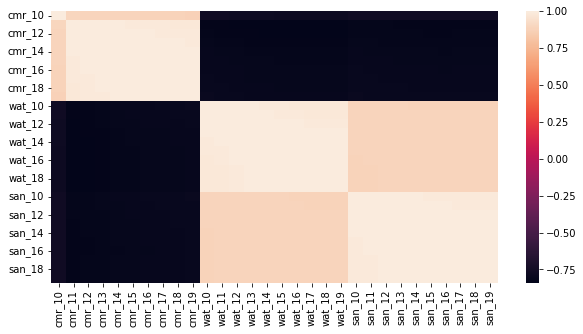

In [ ]:
# Check for multicollinearity

corr = df.corr()
plt.figure(figsize =(10, 5))
sns.heatmap(corr)

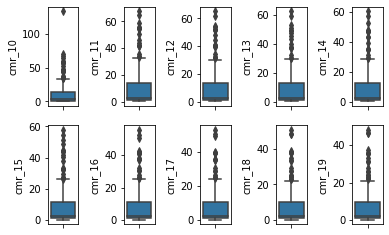

In [ ]:
# Check for outliers in the cmr fields

fig, ax = plt.subplots(2,5)
fig.subplots_adjust(wspace=1.5)
   
sns.boxplot(y=df['cmr_10'], ax=ax[0][0])
sns.boxplot(y=df['cmr_11'], ax=ax[0][1])
sns.boxplot(y=df['cmr_12'], ax=ax[0][2])
sns.boxplot(y=df['cmr_13'], ax=ax[0][3])
sns.boxplot(y=df['cmr_14'], ax=ax[0][4])
sns.boxplot(y=df['cmr_15'], ax=ax[1][0])
sns.boxplot(y=df['cmr_16'], ax=ax[1][1])
sns.boxplot(y=df['cmr_17'], ax=ax[1][2])
sns.boxplot(y=df['cmr_18'], ax=ax[1][3])
sns.boxplot(y=df['cmr_19'], ax=ax[1][4])

In [ ]:
df.head()

,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,cmr_18,cmr_19,wat_10,wat_11,wat_12,wat_13,wat_14,wat_15,wat_16,wat_17,wat_18,wat_19,san_10,san_11,san_12,san_13,san_14,san_15,san_16,san_17,san_18,san_19
0,25.131763,23.641959,22.204697,20.795326,19.494679,18.245083,17.132262,16.129541,15.229539,14.427644,48.356360,50.927307,53.531704,56.169645,58.841232,61.546930,64.286484,67.064623,67.064623,67.064623,34.177028,35.457100,36.749962,38.055832,39.374932,40.707707,42.054183,43.417610,43.417610,43.417610
1,1.436214,1.328161,1.234154,1.156805,1.100109,1.064852,1.049183,1.049069,1.060550,1.077409,87.811285,87.760337,87.860432,89.461088,90.981204,91.001022,91.020370,91.039228,91.039228,91.039228,95.571700,96.184770,96.776433,97.312548,97.676855,97.691034,97.704877,97.718368,97.718368,97.718368
2,3.965096,3.861115,3.784800,3.729676,3.686111,3.643187,3.588058,3.520441,3.447031,3.368520,92.389465,92.616463,92.838351,93.055192,93.267273,93.474596,93.515851,93.555888,93.555888,93.555888,86.560430,86.771741,86.970649,87.157454,87.332734,87.496717,87.542316,87.586571,87.586571,87.586571
3,0.351666,0.308350,0.272581,0.241175,0.211434,0.187943,0.169172,0.154578,0.144879,0.135706,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000,99.500000
4,48.043718,44.027609,40.409043,37.277117,34.545740,32.249390,30.335156,28.619264,27.212428,25.801267,50.376841,51.174835,51.968542,52.757347,53.541509,54.316927,55.084276,55.842905,55.842905,55.842905,41.060793,42.326665,43.591473,44.854793,46.117031,47.374479,48.627945,49.876979,49.876979,49.876979


In [ ]:
# Assign features and label

X = df.drop(["cmr_19"], axis=1)
y = df["cmr_19"]

# Split the features and label into  train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Normalize features

# RobustScaler: The RobustScaler subtracts the median value from each entry and divides by the interquartile range of the feature. 
# Since RobustScaler divides by the interquartile range, the returned frequency distribution penalizes outliers. 
# This makes RobustScaler robust for data with outliers.

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Neural network architecture

model = Sequential()
model.add(Dense(128, input_dim=29, activation='relu'))  # 1st hidden layer
model.add(Dense(64, activation='relu'))                 # 2nd hidden layer
model.add(Dense(32, activation='relu'))                 # 3rd hidden layer
model.add(Dense(1, activation='linear'))                # output layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               3840      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
# Train the model

history = model.fit(X_train, y_train, epochs=200, batch_size= 50, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 1s 84ms/step - loss: 162.7465 - mse: 162.7465 - mae: 7.3115 - val_loss: 99.2852 - val_mse: 99.2852 - val_mae: 5.9646
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 134.4368 - mse: 134.4368 - mae: 6.6465 - val_loss: 82.8073 - val_mse: 82.8073 - val_mae: 5.3829
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 111.8470 - mse: 111.8470 - mae: 6.0019 - val_loss: 67.2663 - val_mse: 67.2663 - val_mae: 4.7725
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 90.2876 - mse: 90.2876 - mae: 5.2934 - val_loss: 51.8424 - val_mse: 51.8424 - val_mae: 4.1860
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 66.5449 - mse: 66.5449 - mae: 4.4878 - val_loss: 37.8320 - val_mse: 37.8320 - val_mae: 3.5868
Epoch 6/200
3/3 [==============================] - 0s 12ms/step - loss: 50.7703 - mse: 50.7703 - mae: 3.8086 - val_loss: 25.3692 - val_mse: 25.3692 - val_mae: 2.951

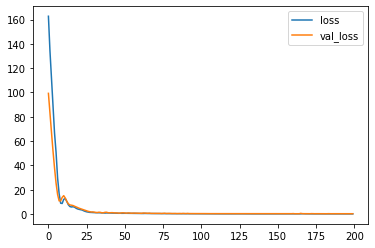

In [ ]:
# Plot the loss and validation loss of the dataset

history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

##### Since both loss and validation loss decrease overtime, the model is trained after 100 epochs without overfitting (loss decreasing while val_loss is stale, or increasing)

In [ ]:
# Evaluate the model

model.evaluate(X_test, y_test, batch_size=50)

1/1 [==============================] - 0s 15ms/step - loss: 0.0831 - mse: 0.0831 - mae: 0.1614


[0.08312182873487473, 0.08312182873487473, 0.16137494146823883]

Text(0.5, 1.0, 'True and predicted values')

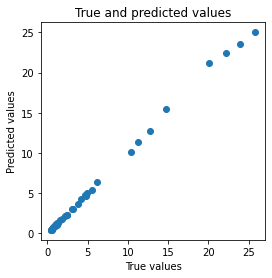

In [ ]:
# Make prediction using test set

pred_test = model.predict(X_test)

plt.axes(aspect='equal')
plt.scatter(y_test, pred_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True and predicted values')

In [ ]:
# Make prediction using train set

pred_train = model.predict(X_train)
print("The RMSE value of the training dataset is :", np.sqrt(mean_squared_error(y_train, pred_train)))
print("The RMSE value of the test dataset is :", np.sqrt(mean_squared_error(y_test, pred_test)))

The RMSE value of the training dataset is : 0.2987963101284859
The RMSE value of the test dataset is : 0.28830820228207815


In [ ]:
pred_test

array([[ 0.5900752 ],
       [ 0.5592216 ],
       [ 2.1154275 ],
       [ 0.47589612],
       [ 4.2960105 ],
       [ 2.2515745 ],
       [ 1.3239502 ],
       [ 1.1082109 ],
       [ 1.0385675 ],
       [ 0.82955   ],
       [ 0.4560855 ],
       [ 0.65431255],
       [ 5.0902553 ],
       [ 0.47469115],
       [ 2.9932492 ],
       [12.766291  ],
       [ 0.5664066 ],
       [ 1.190388  ],
       [25.013376  ],
       [21.181595  ],
       [ 4.7378907 ],
       [ 1.3011259 ],
       [ 1.6372263 ],
       [ 0.9762117 ],
       [ 3.701782  ],
       [ 2.9881063 ],
       [ 1.7960851 ],
       [23.508366  ],
       [22.439188  ],
       [10.151673  ],
       [ 0.90484613],
       [ 5.43629   ],
       [ 2.3539877 ],
       [ 4.6798925 ],
       [ 6.4040475 ],
       [11.422051  ],
       [ 0.5583377 ],
       [ 0.44247252],
       [15.4883375 ]], dtype=float32)

In [ ]:
y_test

31      0.610446
66      0.590196
113     2.214114
156     0.491401
81      4.146543
123     2.369722
35      1.149272
103     1.239809
186     0.996501
99      0.666466
128     0.460571
16      0.671958
73      4.934850
163     0.500391
189     3.226884
67     12.695350
121     0.585851
40      1.083826
4      25.801267
47     20.015564
51      4.635449
172     1.303901
131     1.573451
151     0.969607
29      3.844568
53      3.007346
11      1.764054
108    23.953156
174    22.157499
56     10.335716
14      0.925478
107     5.567226
177     2.400703
19      4.756284
78      6.192980
90     11.222014
112     0.577167
84      0.455529
59     14.724880
Name: cmr_19, dtype: float64

In [ ]:
# Predict Child Mortality Rate in Burkina Faso if increased sanitation by 30% and water access by 30%

x_new = X.iloc[26,:]
x_new['san_19'] = x_new['san_19']*1.30
x_new['wat_19'] = x_new['wat_19']*1.30
x_new = np.array(x_new)
x_new = np.reshape(x_new, (1,29))
x_new_norm = scaler.transform(x_new)
y_new_pred = model.predict(x_new_norm)
print("Child Mortality Rate in", df2["CountryName"][26], "(current): %.2f" % y[26])
print("Child Mortality Rate in", df2["CountryName"][26], "(water and sanitation services improved): %.2f" % y_new_pred)

Child Mortality Rate in Burkina Faso (current): 35.52
Child Mortality Rate in Burkina Faso (proximity-to-target increased): 34.49


In [ ]:
# Predict Child Mortality Rate in Afghanistan if increased sanitation by 30% and water access by 30%

x_new = X.iloc[0,:]
x_new['san_19'] = x_new['san_19']*1.30
x_new['wat_19'] = x_new['wat_19']*1.30
x_new = np.array(x_new)
x_new = np.reshape(x_new, (1,29))
x_new_norm = scaler.transform(x_new)
y_new_pred = model.predict(x_new_norm)
print("Child Mortality Rate in", df2["CountryName"][0], "(current): %.2f" % y[0])
print("Child Mortality Rate in", df2["CountryName"][0], "(water and sanitation services improved): %.2f" % y_new_pred)

Child Mortality Rate in Afghanistan (current): 14.43
Child Mortality Rate in Afghanistan (water and sanitation services increased): 13.40


## CONCLUSIONS

##### The model created is a feed-forward neural network with an input layer of 29 features, 3 hidden layers and an output layer with 1 node.

##### The model is quite accurate at predicting the child mortality rate of different countries, since the loss function used to evaluate the model is quite low. There is no underfitting or overfitting, so we can assume that is doing a good job at predicting new values.

##### Child mortality rate from previous years is objective available data. Playing with water and sanitation levels, allows us to see the impact they have on child mortality.

##### From the results of the model, it is fair to say that access to sanitation and water are not the only features that control child mortality (hospitals, GDP, etc.).
